## Predict the Criminals

#### Installation of the XGBoost

In [1]:
!conda install -c conda-forge xgboost --yes

Solving environment: failed

CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.continuum.io/pkgs/main/noarch/repodata.json.bz2>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
ConnectionError(MaxRetryError("HTTPSConnectionPool(host='repo.continuum.io', port=443): Max retries exceeded with url: /pkgs/main/noarch/repodata.json.bz2 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f5b341d8250>: Failed to establish a new connection: [Errno -2] Name or service not known',))",),)




<img src="flow_chart.png" height=200px width=800px></img>

## 01 : Frame the Problem

The dataset contains the answers to private and personal life of people.Given this, we have to predict whether a person is criminal or not.The train data consists of 45718 rows, while the test data consists of 11430 rows.

#### Problem Link:https://www.hackerearth.com/challenge/competitive/predict-the-criminal/machine-learning/predict-the-criminal/

## 02 : Obtain Data

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier      #
from sklearn import cross_validation, metrics  #to include metrics for evaluation
from sklearn.grid_search import GridSearchCV #to use gridsearchcv
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline

/home/sethu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/sethu/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Get the Data

In [3]:
crim_data=pd.read_csv('criminal_train.csv')

## 03 : Analyze Data 

In [4]:
crim_data.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [5]:
crim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45718 entries, 0 to 45717
Data columns (total 72 columns):
PERID        45718 non-null int64
IFATHER      45718 non-null int64
NRCH17_2     45718 non-null int64
IRHHSIZ2     45718 non-null int64
IIHHSIZ2     45718 non-null int64
IRKI17_2     45718 non-null int64
IIKI17_2     45718 non-null int64
IRHH65_2     45718 non-null int64
IIHH65_2     45718 non-null int64
PRXRETRY     45718 non-null int64
PRXYDATA     45718 non-null int64
MEDICARE     45718 non-null int64
CAIDCHIP     45718 non-null int64
CHAMPUS      45718 non-null int64
PRVHLTIN     45718 non-null int64
GRPHLTIN     45718 non-null int64
HLTINNOS     45718 non-null int64
HLCNOTYR     45718 non-null int64
HLCNOTMO     45718 non-null int64
HLCLAST      45718 non-null int64
HLLOSRSN     45718 non-null int64
HLNVCOST     45718 non-null int64
HLNVOFFR     45718 non-null int64
HLNVREF      45718 non-null int64
HLNVNEED     45718 non-null int64
HLNVSOR      45718 non-null int64
IRMCDCH

## Brief Introduction On the Model Being Used:

    Ensemble:
        It is a collection of predictors which are put together to give the final prediction.This is done beacause a collection of predictors together give better performance than a single predictor.There are two techniques of ensembling:
        Bagging:
            This involves building independent predictors and combining all the predictors to give the final prediction
        Boosting:
            This involves building the predictors sequentially rather than building each predictor independently.In these predictors learn from the mistakes commited by previous predictors.
    Gradient Boosting:
        Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.One of the widely used algorithms in gradient boosting is XGBoost algorithm.
    XGBoost(eXtreme Gradient Boosting):
        XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. 

#### XgBoostClassifier:
    It is an implementation of sklearn api for XgBoost Classification.The parameters of the XGBClassifier are:
        booster [default=gbtree]:
            Select the type of model to run at each iteration.
        silent [default=0]:
            Silent mode is activated is set to 1, i.e. no running messages will be printed.
        nthread [default to maximum number of threads available if not set]:
            This is used for parallel processing and number of cores in the system should be entered
        eta [default=0.3]:
            learning rate in GBM
        min_child_weight [default=1]:
            Defines the minimum sum of weights of all observations required in a child.
        max_depth [default=6]:
            The maximum depth of a tree.Used to control over-fitting as higher depth will allow model to learn relations 
            very specific to a particular sample.
        max_leaf_nodes:
            The maximum number of terminal nodes or leaves in a tree.Can be defined in place of max_depth.
        gamma [default=0]:
        A node is split only when the resulting split gives a positive reduction in the loss function.Gamma specifies 
        the minimum loss reduction required to make a split.
        subsample [default=1]:
            Denotes the fraction of observations to be randomly samples for each tree.
        colsample_bytree [default=1]:
            Denotes the fraction of columns to be randomly samples for each tree.
        colsample_bylevel [default=1]:
            Denotes the subsample ratio of columns for each split, in each level.
    

## 04 and 05 : Feature Engineering and Model Selection 

<img src="supervised_flow_chart.png"></img>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(crim_data.drop('Criminal',axis=1), 
                                                    crim_data['Criminal'], test_size=0.30, 
                                                    random_state=101)

In [7]:
train=pd.concat([X_train,y_train],axis=1)

#function to estimate the best value of n_estimators and fit the model with the given data

In [8]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        #to get the parameters of xgboost
        xgb_param = alg.get_xgb_params() 
        
        #to convert into a datastructure internally used by xgboost for training efficiency 
        # and speed
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        
        #xgb.cv is used to find the number of estimators required for the parameters 
        # which are set
        cvresult = xgb.cv(xgb_param, xgtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                        metrics='auc', early_stopping_rounds=early_stopping_rounds)
        
        #setting the n_estimators parameter using set_params
        alg.set_params(n_estimators=cvresult.shape[0])
        
        print(alg.get_xgb_params())
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Criminal'],eval_metric='auc')
    
    return alg

In [9]:
#function to get the accuracy of the model on the test data given the features considered

In [10]:
def get_accuracy(alg,predictors):
    dtrain_predictions = alg.predict(X_test[predictors])
    dtrain_predprob = alg.predict_proba(X_test[predictors])[:,1]
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, 
                                                      dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test.values, 
                                                           dtrain_predprob))

In [11]:
#function to get the feature importances based on the model fit

In [12]:
def get_feature_importances(alg):
    #to get the feature importances based on xgboost we use fscore
    feat_imp = pd.Series(alg._Booster.get_fscore()).sort_values(ascending=False)
    print(feat_imp)
    
    #this shows the feature importances on a bar chart
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [13]:
target = 'Criminal'
IDcol = 'PERID'

In [14]:
#to return the XGBClassifier object based on the values of the features

In [15]:
def XgbClass(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,
             gamma=0,subsample=0.8,colsample_bytree=0.8):
    xgb1 = XGBClassifier(learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         min_child_weight=min_child_weight,
                         gamma=gamma,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree)
    return xgb1  

In [16]:
#Function to return the list of predictors

In [17]:
#these are the initial parameters before tuning
def drop_features(l):
    return [x for x in train.columns if x not in l]

### First Prediction : Use of initial parameters and without feature engineering

In [18]:
predictors = drop_features([target, IDcol])
xgb1=XgbClass()
first_model=modelfit(xgb1, train, predictors)
xgb1.fit(train[predictors],train['Criminal'])

{'reg_alpha': 0, 'colsample_bytree': 0.8, 'silent': 1, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.1, 'missing': None, 'max_delta_step': 0, 'nthread': 1, 'base_score': 0.5, 'n_estimators': 110, 'subsample': 0.8, 'reg_lambda': 1, 'min_child_weight': 1, 'objective': 'binary:logistic', 'seed': 0, 'max_depth': 5, 'gamma': 0, 'booster': 'gbtree'}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=110,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [19]:
get_accuracy(first_model,predictors)


Model Report
Accuracy : 0.9524
AUC Score (Train): 0.973564


/home/sethu/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ANALWT_C     254
VESTR        160
IRFAMIN3     132
GRPHLTIN     106
IRPINC3       78
IRHHSIZ2      68
POVERTY3      48
IRKI17_2      37
IFATHER       36
HLCNOTMO      35
NRCH17_2      29
COUTYP2       28
IRFAMSOC      26
IIFAMIN3      24
PDEN10        24
CELLNOTCL     21
VEREP         20
CAIDCHIP      20
IRHH65_2      17
IRPRVHLT      17
HLCNOTYR      17
PRVHLTIN      16
MEDICARE      15
PRXYDATA      15
IRFAMPMT      12
IRWELMOS      12
TROUBUND      11
PRXRETRY      11
GOVTPROG      11
IIWELMOS      11
IRMEDICR      10
IRFAMSSI      10
IIPINC3        9
IRFSTAMP       9
TOOLONG        8
OTHINS         7
IRMCDCHP       7
IIFAMSSI       7
CELLWRKNG      5
CHAMPUS        3
IIFAMSVC       2
MAIIN102       2
IRFAMSVC       2
IIPRVHLT       2
IIFSTAMP       2
IRINSUR4       2
IIFAMPMT       2
IIFAMSOC       2
IIKI17_2       2
IRCHMPUS       1
ANYHLTI2       1
dtype: int64


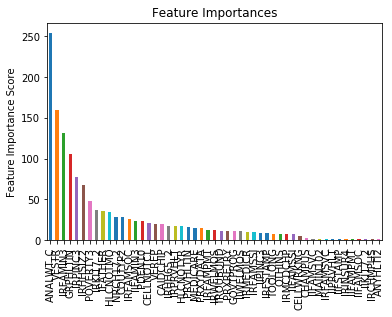

In [20]:
get_feature_importances(first_model)

### Second Prediction : Using intial Parameters and removing features of least importances

In [21]:
#model after removing the features of least importance

In [22]:
dropl=['IRWELMOS','MAIIN102','IIPINC3','HLTINNOS','IIHH65_2','TOOLONG']

In [23]:
dropl_first=dropl+[target,IDcol]

In [24]:
#these are the initial parameters before tuning
predictors = drop_features(dropl_first)
xgb1 = XgbClass()
second_model=modelfit(xgb1, train, predictors)

{'reg_alpha': 0, 'colsample_bytree': 0.8, 'silent': 1, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.1, 'missing': None, 'max_delta_step': 0, 'nthread': 1, 'base_score': 0.5, 'n_estimators': 81, 'subsample': 0.8, 'reg_lambda': 1, 'min_child_weight': 1, 'objective': 'binary:logistic', 'seed': 0, 'max_depth': 5, 'gamma': 0, 'booster': 'gbtree'}


In [25]:
get_accuracy(second_model,predictors)


Model Report
Accuracy : 0.9522
AUC Score (Train): 0.973655


/home/sethu/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


ANALWT_C     125
GRPHLTIN      96
IRFAMIN3      94
IRPINC3       63
VESTR         53
IRHHSIZ2      48
POVERTY3      34
IFATHER       29
HLCNOTMO      23
IRKI17_2      20
IRFAMSOC      17
VEREP         15
PDEN10        14
COUTYP2       14
HLCNOTYR      13
PRXYDATA      12
IIWELMOS      12
MEDICARE      12
CAIDCHIP      10
NRCH17_2      10
IIFAMIN3      10
PRVHLTIN       9
PRXRETRY       9
IRHH65_2       8
CELLNOTCL      8
IRMEDICR       8
IRFAMPMT       8
IRPRVHLT       8
GOVTPROG       7
IRMCDCHP       7
IRFAMSSI       7
TROUBUND       6
IIFAMSSI       5
OTHINS         5
IRFSTAMP       4
IIFAMPMT       3
IIFAMSOC       2
IIKI17_2       2
CHAMPUS        2
ANYHLTI2       2
IIFAMSVC       1
IIPRVHLT       1
IROTHHLT       1
HLCLAST        1
IRFAMSVC       1
dtype: int64


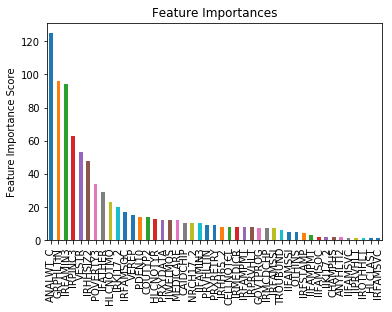

In [26]:
get_feature_importances(second_model)

### Third Prediction : Again removing the features of least importance

In [27]:
dropl1=dropl+['IRMCDCHP','HLCLAST','IIKI17_2','IRFAMPMT','IRFSTAMP','ANYHLTI2','IIFAMSVC']
dropl_second=dropl_first+['IRMCDCHP','HLCLAST','IIKI17_2','IRFAMPMT','IRFSTAMP','ANYHLTI2',
                          'IIFAMSVC']

In [28]:
predictors=drop_features(dropl_second)

In [29]:
xgb1=XgbClass()
third_model1=modelfit(xgb1,train,predictors)

{'reg_alpha': 0, 'colsample_bytree': 0.8, 'silent': 1, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.1, 'missing': None, 'max_delta_step': 0, 'nthread': 1, 'base_score': 0.5, 'n_estimators': 91, 'subsample': 0.8, 'reg_lambda': 1, 'min_child_weight': 1, 'objective': 'binary:logistic', 'seed': 0, 'max_depth': 5, 'gamma': 0, 'booster': 'gbtree'}


In [30]:
get_accuracy(third_model1,predictors)


Model Report
Accuracy : 0.9526
AUC Score (Train): 0.973444


/home/sethu/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## 06 : Tune the Model

In [31]:
def RunTestAndSaveResults(features,filename,model):
    df1=pd.read_csv('criminal_test.csv')
    for i in features:
        df1.drop(i,axis=1,inplace=True)
    predict=model.predict(df1.drop('PERID',axis=1))
    data=pd.DataFrame(df1['PERID'],columns=['PERID'])
    data['Criminal']=predict
    data.to_csv(filename,index=False)

In [32]:
#tune max_depth and min_child_weight

In [33]:
predictors = drop_features(dropl_first)

In [34]:
param_test1 = {
 'max_depth':list(range(3,10,2)),
 'min_child_weight':list(range(1,6,2))
}
gsearch1 = GridSearchCV(estimator=XgbClass(n_estimators=48),param_grid =param_test1,
                        scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.97082, std: 0.00147, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.97081, std: 0.00146, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.97081, std: 0.00147, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.97212, std: 0.00132, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.97210, std: 0.00122, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.97210, std: 0.00123, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.97238, std: 0.00145, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.97232, std: 0.00149, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.97238, std: 0.00154, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.97170, std: 0.00144, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.97197, std: 0.00133, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.97195, std: 0.00155, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 7, 'min_child_weight': 5

In [35]:
#if the best parameters are edge values then we do 
#gridsearchcv by taking one less and one value more than the best parameters

In [36]:
param_test2 = {
 'max_depth':[6,7,8,9],
 'min_child_weight':[2,3,4,5]
}
gsearch2 = GridSearchCV(estimator=XgbClass(n_estimators=48),param_grid =param_test2,scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.97230, std: 0.00161, params: {'max_depth': 6, 'min_child_weight': 2},
  mean: 0.97223, std: 0.00144, params: {'max_depth': 6, 'min_child_weight': 3},
  mean: 0.97236, std: 0.00150, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.97217, std: 0.00147, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.97209, std: 0.00158, params: {'max_depth': 7, 'min_child_weight': 2},
  mean: 0.97232, std: 0.00149, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.97250, std: 0.00159, params: {'max_depth': 7, 'min_child_weight': 4},
  mean: 0.97238, std: 0.00154, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.97183, std: 0.00160, params: {'max_depth': 8, 'min_child_weight': 2},
  mean: 0.97224, std: 0.00153, params: {'max_depth': 8, 'min_child_weight': 3},
  mean: 0.97210, std: 0.00148, params: {'max_depth': 8, 'min_child_weight': 4},
  mean: 0.97233, std: 0.00147, params: {'max_depth': 8, 'min_child_weight': 5},
  mean: 0.97174, std: 0.00156, params: {

In [37]:
xgb1 = XgbClass(max_depth=8,min_child_weight=4)
model=modelfit(xgb1, train, predictors)

{'reg_alpha': 0, 'colsample_bytree': 0.8, 'silent': 1, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.1, 'missing': None, 'max_delta_step': 0, 'nthread': 1, 'base_score': 0.5, 'n_estimators': 30, 'subsample': 0.8, 'reg_lambda': 1, 'min_child_weight': 4, 'objective': 'binary:logistic', 'seed': 0, 'max_depth': 8, 'gamma': 0, 'booster': 'gbtree'}


In [38]:
get_accuracy(model,predictors)


Model Report
Accuracy : 0.9522
AUC Score (Train): 0.973212


/home/sethu/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [39]:
#to tune gamma

In [40]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,8)]
}
gsearch3=GridSearchCV(estimator=XgbClass(n_estimators=48,max_depth=7,min_child_weight=5),
                      param_grid =param_test3,scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.97238, std: 0.00154, params: {'gamma': 0.0},
  mean: 0.97236, std: 0.00154, params: {'gamma': 0.1},
  mean: 0.97230, std: 0.00152, params: {'gamma': 0.2},
  mean: 0.97233, std: 0.00161, params: {'gamma': 0.3},
  mean: 0.97234, std: 0.00166, params: {'gamma': 0.4},
  mean: 0.97227, std: 0.00154, params: {'gamma': 0.5},
  mean: 0.97222, std: 0.00155, params: {'gamma': 0.6},
  mean: 0.97232, std: 0.00158, params: {'gamma': 0.7}],
 {'gamma': 0.0},
 0.97237896735595)

In [41]:
xgb1 = XgbClass(max_depth=8,min_child_weight=4,gamma=0.4)
model=modelfit(xgb1, train, predictors)

{'reg_alpha': 0, 'colsample_bytree': 0.8, 'silent': 1, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.1, 'missing': None, 'max_delta_step': 0, 'nthread': 1, 'base_score': 0.5, 'n_estimators': 30, 'subsample': 0.8, 'reg_lambda': 1, 'min_child_weight': 4, 'objective': 'binary:logistic', 'seed': 0, 'max_depth': 8, 'gamma': 0.4, 'booster': 'gbtree'}


In [42]:
get_accuracy(model,predictors)


Model Report
Accuracy : 0.9519
AUC Score (Train): 0.973183


/home/sethu/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [43]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4=GridSearchCV(estimator=XgbClass(n_estimators=48,max_depth=7,
                                         min_child_weight=5,gamma=0),
                      param_grid =param_test4,scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.97219, std: 0.00189, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.97212, std: 0.00173, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.97230, std: 0.00153, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.97207, std: 0.00158, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.97236, std: 0.00141, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.97230, std: 0.00186, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.97222, std: 0.00177, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.97207, std: 0.00148, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.97227, std: 0.00164, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.97229, std: 0.00161, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.97238, std: 0.00154, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.97239, std: 0.00145, params: {'subsample': 0.9, 'colsample_bytree'

In [44]:
xgb1 = XgbClass(max_depth=8,min_child_weight=4,gamma=0.4,subsample=0.8,colsample_bytree=0.6)
model=modelfit(xgb1, train, predictors)

{'reg_alpha': 0, 'colsample_bytree': 0.6, 'silent': 1, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.1, 'missing': None, 'max_delta_step': 0, 'nthread': 1, 'base_score': 0.5, 'n_estimators': 52, 'subsample': 0.8, 'reg_lambda': 1, 'min_child_weight': 4, 'objective': 'binary:logistic', 'seed': 0, 'max_depth': 8, 'gamma': 0.4, 'booster': 'gbtree'}


In [45]:
get_accuracy(model,predictors)


Model Report
Accuracy : 0.9513
AUC Score (Train): 0.973637


/home/sethu/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [46]:
dropl=['IRWELMOS','MAIIN102','IIPINC3','HLTINNOS','IIHH65_2','TOOLONG']
dropl =dropl+ ['HLCLAST','IIFAMSVC', 'IIKI17_2', 'ANYHLTI2', 'IRFAMPMT', 'IRFSTAMP', 'IRMCDCHP']
RunTestAndSaveResults(dropl,'final_result.csv',third_model1)

/home/sethu/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## 07 : Predicting on New Data

In [47]:
#Function stores the result in required csv file and features

In [48]:
RunTestAndSaveResults([],'result.csv',first_model)

/home/sethu/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [49]:
#This model is giving high accurancy since we applied feature engineering

In [50]:
dropl

['IRWELMOS',
 'MAIIN102',
 'IIPINC3',
 'HLTINNOS',
 'IIHH65_2',
 'TOOLONG',
 'HLCLAST',
 'IIFAMSVC',
 'IIKI17_2',
 'ANYHLTI2',
 'IRFAMPMT',
 'IRFSTAMP',
 'IRMCDCHP']

In [51]:
RunTestAndSaveResults(dropl,'result.csv',second_model)

ValueError: feature_names mismatch: [u'IFATHER', u'NRCH17_2', u'IRHHSIZ2', u'IIHHSIZ2', u'IRKI17_2', u'IIKI17_2', u'IRHH65_2', u'PRXRETRY', u'PRXYDATA', u'MEDICARE', u'CAIDCHIP', u'CHAMPUS', u'PRVHLTIN', u'GRPHLTIN', u'HLCNOTYR', u'HLCNOTMO', u'HLCLAST', u'HLLOSRSN', u'HLNVCOST', u'HLNVOFFR', u'HLNVREF', u'HLNVNEED', u'HLNVSOR', u'IRMCDCHP', u'IIMCDCHP', u'IRMEDICR', u'IIMEDICR', u'IRCHMPUS', u'IICHMPUS', u'IRPRVHLT', u'IIPRVHLT', u'IROTHHLT', u'IIOTHHLT', u'HLCALLFG', u'HLCALL99', u'ANYHLTI2', u'IRINSUR4', u'IIINSUR4', u'OTHINS', u'CELLNOTCL', u'CELLWRKNG', u'IRFAMSOC', u'IIFAMSOC', u'IRFAMSSI', u'IIFAMSSI', u'IRFSTAMP', u'IIFSTAMP', u'IRFAMPMT', u'IIFAMPMT', u'IRFAMSVC', u'IIFAMSVC', u'IIWELMOS', u'IRPINC3', u'IRFAMIN3', u'IIFAMIN3', u'GOVTPROG', u'POVERTY3', u'TROUBUND', u'PDEN10', u'COUTYP2', u'AIIND102', u'ANALWT_C', u'VESTR', u'VEREP'] [u'IFATHER', u'NRCH17_2', u'IRHHSIZ2', u'IIHHSIZ2', u'IRKI17_2', u'IRHH65_2', u'PRXRETRY', u'PRXYDATA', u'MEDICARE', u'CAIDCHIP', u'CHAMPUS', u'PRVHLTIN', u'GRPHLTIN', u'HLCNOTYR', u'HLCNOTMO', u'HLLOSRSN', u'HLNVCOST', u'HLNVOFFR', u'HLNVREF', u'HLNVNEED', u'HLNVSOR', u'IIMCDCHP', u'IRMEDICR', u'IIMEDICR', u'IRCHMPUS', u'IICHMPUS', u'IRPRVHLT', u'IIPRVHLT', u'IROTHHLT', u'IIOTHHLT', u'HLCALLFG', u'HLCALL99', u'IRINSUR4', u'IIINSUR4', u'OTHINS', u'CELLNOTCL', u'CELLWRKNG', u'IRFAMSOC', u'IIFAMSOC', u'IRFAMSSI', u'IIFAMSSI', u'IIFSTAMP', u'IIFAMPMT', u'IRFAMSVC', u'IIWELMOS', u'IRPINC3', u'IRFAMIN3', u'IIFAMIN3', u'GOVTPROG', u'POVERTY3', u'TROUBUND', u'PDEN10', u'COUTYP2', u'AIIND102', u'ANALWT_C', u'VESTR', u'VEREP']
expected IRMCDCHP, IIFAMSVC, IIKI17_2, ANYHLTI2, IRFAMPMT, IRFSTAMP, HLCLAST in input data

In [ ]:
#When the features are repeated again and again then overfitting takes place and the accuracy decrease

In [ ]:
RunTestAndSaveResults(dropl1,'result1.csv',third_model1)